# Analysis of the video games dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from itertools import product

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/video-game-ratings-from-imdb/imdb_video_game_rating.csv


In [2]:
# Set font size and style
plt.rcParams['font.size'] = 18
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams['axes.titlesize'] = 20

In [3]:
# Import dataset
games = pd.read_csv('../input/video-game-ratings-from-imdb/imdb_video_game_rating.csv')
display(games.head())

,Unnamed: 0,title,year,genre,rating,votes,directors,plot
0,0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,1,Red Dead Redemption II,2018,"Action, Adventure, Crime",9.7,"36,441",Missing,Amidst the decline of the Wild West at the tur...
2,2,The Witcher 3: Wild Hunt - Blood and Wine,2016,"Action, Adventure, Drama",9.7,"7,610",Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,3,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,"26,328",Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,4,The Last of Us,2013,"Action, Adventure, Drama",9.7,"61,103","Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."


## Data Cleaning and processing

In [4]:
# Drop the first unnamed column
games.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
# Convert year and votes columns to integers
years_list = games.year.value_counts().index
print('All the years in the dataset')
display(years_list)
print()

# Extract incorrect years that do not start with 1 or 2
incorrect_years = [year for year in years_list if (not year.startswith('1')) if (not year.startswith('2'))]

#Show incorrect years
display('Incorrect years',incorrect_years)

All the years in the dataset


Index(['2017', '2015', '2016', '2013', '2018', '2005', '2019', '2003', '2002',
       '2012', '2006', '2014', '2004', '2010', '2000', '2001', '2009', '1999',
       '2011', '2007', '2008', '2020', '1994', '1996', '1998', '1993', '2021',
       '1997', '1995', '1992', '1991', '1990', '1989', '1987', '1988', '2022',
       '1986', '1984', '1983', '1982', '1985', '1981', 'I)', '1980', 'II)',
       '1979', '1978', '1977', '1972', '1976', '1975', 'III)', '1973', '1974',
       '1971', '1969', '1948', '1952', '1958', 'IV)', '1962', 'Video', '1970'],
      dtype='object')

'Incorrect years'

['I)', 'II)', 'III)', 'IV)', 'Video']

**Let's find the size of the dataset with incorrect year and replace the values with NaN**

In [6]:
# Extract games with wrong years
games_year_incorrect = games.loc[games['year'].isin(incorrect_years)]
print('Number of games with incorrect years is ',len(games_year_incorrect))

# Convert incorrect values to nan
games.loc[games['year'].isin(incorrect_years),'year'] = np.nan

Number of games with incorrect years is  103


In [7]:
# Convert the votes column to integer
games['votes'] = games.votes.apply(lambda x: x.replace(',','')).astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12635 entries, 0 to 12634
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      12635 non-null  object 
 1   year       12532 non-null  object 
 2   genre      12635 non-null  object 
 3   rating     12635 non-null  float64
 4   votes      12635 non-null  int64  
 5   directors  12635 non-null  object 
 6   plot       12635 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 691.1+ KB


In [8]:
# Convert the year column to numeric. 
# Converting to integer type outputs an error due to presence of null values
games['year'] = games['year'].astype('float')

# Let's create a decade column to show the decade when the game was launched
games['decade'] = np.floor(games['year']//10)*10

## Exploratory Data Analysis

### Game production per decade
The production of games has been increasing steadily in each decade. The 1940s, 50s, and 60s had the lowest number of games with one, two and three respectively. The 2020 decade has barely started and the number of games is almost exceeding those produced in the 80s.

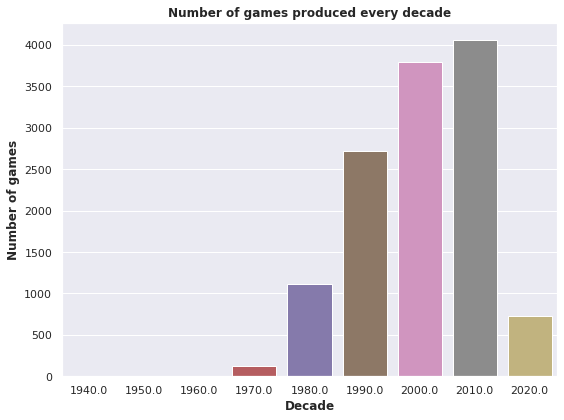

In [9]:
# Visualize the number of games for each decade using a countplot
sns.set()
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='decade',data=games)
ax.set(title='Number of games produced every decade', xlabel='Decade',ylabel='Number of games')
plt.tight_layout()
plt.show()

### Ratings
The Last of Us: Part I is the highest rated game in the dataset with 9.8. Among the top 10 highest rated games, two games appear twice i.e. The Last of Us (2013 and 2022) and The Witcher 3 (2015 and 2016). In the nine decades of game production, not a single game has attained the highest possible rating of 10.

In [10]:
print('10 Highest rated games')
games.nlargest(10,'rating')

10 Highest rated games


,title,year,genre,rating,votes,directors,plot,decade
0,The Last of Us: Part I,2022.0,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...,2020.0
1,Red Dead Redemption II,2018.0,"Action, Adventure, Crime",9.7,36441,Missing,Amidst the decline of the Wild West at the tur...,2010.0
2,The Witcher 3: Wild Hunt - Blood and Wine,2016.0,"Action, Adventure, Drama",9.7,7610,Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...,2010.0
3,The Witcher 3: Wild Hunt,2015.0,"Action, Adventure, Drama",9.7,26328,Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...,2010.0
4,The Last of Us,2013.0,"Action, Adventure, Drama",9.7,61103,"Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El...",2010.0
5,Mass Effect: Legendary Edition,2021.0,"Action, Adventure, Sci-Fi",9.7,1628,"Casey Hudson, Mac Walters",A compilation of the first three Mass Effect g...,2020.0
6,God of War,2018.0,"Action, Adventure, Drama",9.6,26507,Cory Barlog,"After wiping out the gods of Mount Olympus, Kr...",2010.0
7,Persona 5 Royal,2019.0,"Action, Adventure, Fantasy",9.6,1214,Daiki Itô,A group of high school students create a vigil...,2010.0
8,The Legend of Zelda: Ocarina of Time,1998.0,"Action, Adventure, Fantasy",9.6,9576,"Eiji Aonuma, Yoichi Yamada, Yoshiaki Koizumi, ...",A young Kokiri boy discovers that his destiny ...,1990.0
9,Metal Gear Solid,1998.0,"Action, Adventure, Drama",9.6,11809,Hideo Kojima,A crack government anti-terrorist squad takes ...,1990.0


### Distribution of ratings
The games ratings are skewed to the left with majority of ratings (1 to 6) falling to the left of the mean. The mean is also to the left of the median

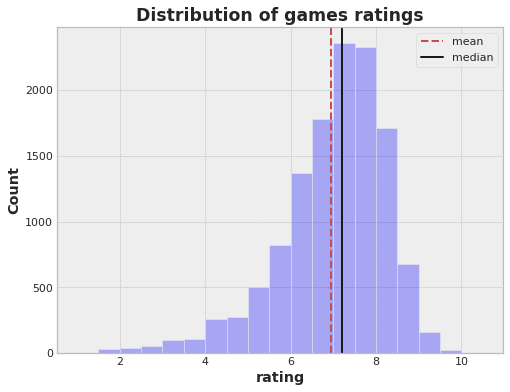

In [11]:
# Visualize the distribution or rating
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x='rating',data=games,bins=np.arange(1,11,0.5),ax=ax,alpha=0.3)
plt.axvline(games.rating.mean(),color='r',ls='--',label='mean')
plt.axvline(games.rating.median(),color='k',ls='-',label='median')
plt.title('Distribution of games ratings')
plt.legend()
plt.show()

**Surprisingly, the lowest rated games are not produced between 1940s and 1970s as you would expect. The lowest rated game - CrazyBus - was launched in 2004 and has a rating of 1.0**

In [12]:
print('10 Lowest rated games')
games.nsmallest(10,'rating')

10 Lowest rated games


,title,year,genre,rating,votes,directors,plot,decade
12634,CrazyBus,2004.0,"Adventure, Family",1.0,126,Tom Maneiro,You get to select your bus and drive it across...,2000.0
12633,Animal Soccer World,2005.0,"Animation, Sport",1.2,125,Roswitha Haas,Everybody is busy with the preparations for th...,2000.0
12631,Action 52,1991.0,"Action, Family, Fantasy",1.3,135,"Raul Gomila, Vince Perri",Play the action at your fingertips with 52 gam...,1990.0
12632,Plumbers Don't Wear Ties,1994.0,"Comedy, Romance",1.3,338,Michael Anderson,"John, an unattached plumber, meets and falls i...",1990.0
12629,Ride to Hell: Retribution,2013.0,"Action, Crime, Thriller",1.4,307,Missing,"A Vietnam veteran, who has recently returned h...",2010.0
12630,Superman,1999.0,"Action, Adventure, Family",1.4,646,Missing,The first 3D Superman game. Your friends Lois ...,1990.0
12624,Hunt Down the Freeman,2018.0,"Action, Adventure, Sci-Fi",1.5,229,Berkan Denizyaran,This one guy tickle another dude's balls for m...,2010.0
12625,E.T. Phone Home!,1983.0,"Adventure, Family, Sci-Fi",1.5,28,Missing,The infamous Atari video game from the blockbu...,1980.0
12626,Jenga World Tour,2007.0,Action,1.5,17,Missing,"Video game based on the Jenga puzzle game, tak...",2000.0
12627,Super Noah's Ark 3D,1994.0,Action,1.5,42,Missing,Noah has to feed the animals in his Ark.,1990.0


**In the 100 lowest rated games, almost half (41) are produced between 2010 and 2019 while 20 are produced between 2000 and 2009 and another 20 between 1990 and 1999. The 1970s only account for 4 games. Surprisingly, the 2020s decade has already produced 6 lowly rated games.**

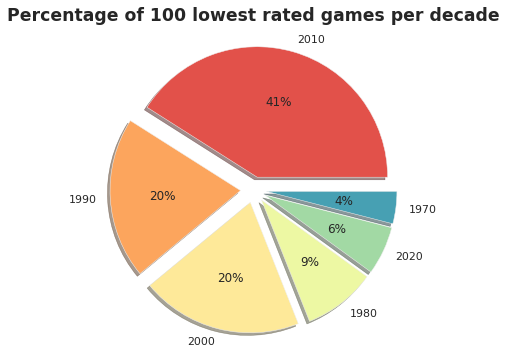

In [13]:
# Which decade produced majority of the lowest 100 rated games
lowest_rated_100 = games.loc[games.rating.nsmallest(100).index,['decade']].value_counts().reset_index()
lowest_rated_100['decade'] = lowest_rated_100.decade.astype('int')

# Visualize
sns.set_palette('Spectral')
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(lowest_rated_100[0],labels=lowest_rated_100.decade,shadow=True,autopct='%1.0f%%',
        explode=[0.1,0.1,0.1,0.1,0.1,0.1])
ax.set(title='Percentage of 100 lowest rated games per decade')
plt.show()

**Even with the advent of technology, the 2020s managed to produce games with very low ratings - as low as 1.8**

In [14]:
# Get the least rated games
lowest_rated_games = games.loc[games.rating.nsmallest(100).index,['title','year','rating','votes','decade']]

# Get the lowest rated games in 2020s
lowest_rated_games_2020s = lowest_rated_games.loc[lowest_rated_games.decade==2020,['title','year','rating','votes']]
display(lowest_rated_games_2020s)

,title,year,rating,votes
12611,Taishogun: The Rise of Emperor,2021.0,1.8,21
12612,Shadow the Ronin,2020.0,1.8,37
12592,Chickens on the Road,2020.0,2.0,17
12577,Fast and Furious Crossroads,2020.0,2.2,368
12552,eFootball 2022,2021.0,2.4,216
12553,Road Bustle,2020.0,2.4,25


### Ranking

Ranking of the video games is reflected by a balance between number of votes and rating. 

While the formula is not explicitly given by imdb, a number of websites including stack overflow have confirmed it's reliability. You are free to try other reliable formulae for this ranking. The formula ratings and votes to compute the weighted rating as follows:

```Weighted rating (WR) = (v/(v + m)) * R + ( m / (v + m)) * C```

<p>where:</p>

* R = average for the movie (mean) = (Rating)
* v = number of votes for the movie = (votes)
* m = minimum votes required to be listed in the Top 50 (currently 1000)
* C = the mean vote across the whole report (currently 6.95)

**As shown, the weighed rating uses both the ratings and number of votes to generate the ranking**

In [15]:
v = games.votes
m = 1000
R = games.rating
C = games.rating.mean()

# Create the weighted rating column
games['weighted_rating'] = ((v/(v + m)) * R + ( m / (v + m)) * C)

# sorting by the weighted rating in descending order
games_ranking = games.sort_values('weighted_rating',ascending=False).reset_index().drop('index',axis=1)

# Show top 50 results 
display(games_ranking[['title','rating','votes','weighted_rating']].nlargest(50,'weighted_rating'))
C

,title,rating,votes,weighted_rating
0,The Last of Us,9.7,61103,9.655640
1,Red Dead Redemption II,9.7,36441,9.626420
2,The Witcher 3: Wild Hunt,9.7,26328,9.599191
3,God of War,9.6,26507,9.503483
4,Grand Theft Auto V,9.5,60381,9.458376
5,Uncharted 4: A Thief's End,9.5,28985,9.414794
6,Red Dead Redemption,9.5,26767,9.407988
7,Metal Gear Solid,9.6,11809,9.392732
8,The Witcher 3: Wild Hunt - Blood and Wine,9.7,7610,9.380035
9,Mass Effect 2,9.5,19961,9.378112


6.945104867431738

### Relationship between variables
**Has the average rating of video games changed or remained constant over the years?**

There seems to be a positive correlation between the year and average rating of the video games.

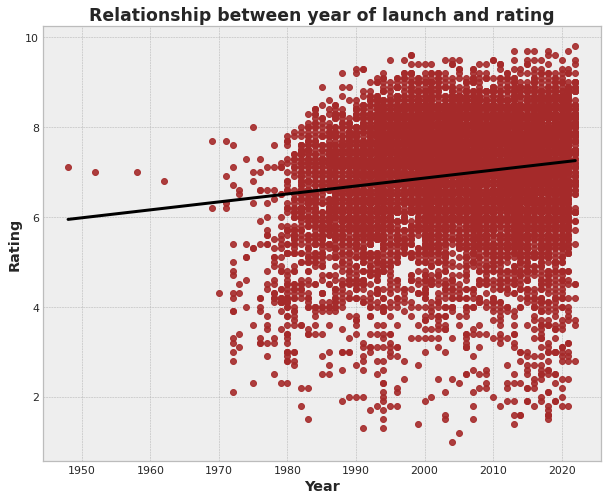

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x='year',y='rating',data=games,color='brown',line_kws={'color':'black'},ci=None,scatter_kws={'marker':'s','alpha':0.9})
ax.set(title='Relationship between year of launch and rating',xlabel='Year',ylabel='Rating')
plt.show()

**There is a non-linear relationship between rating and number of votes**

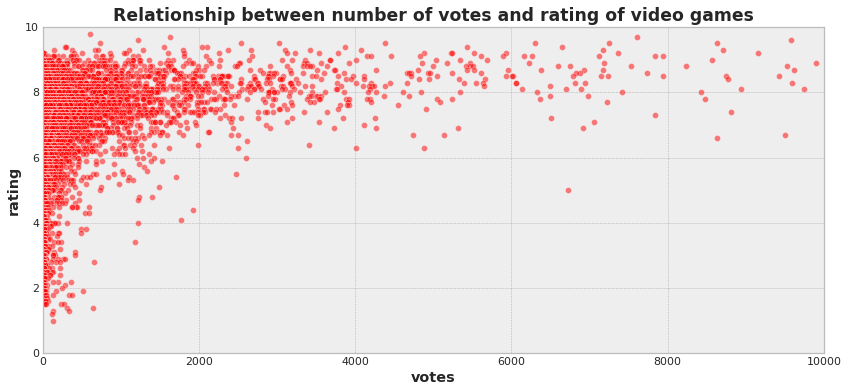

In [17]:
# Relationship between the number of votes and rating
fig, ax = plt.subplots(figsize=(14,6),)
sns.scatterplot(x='votes',y='rating',data=games,color='red',alpha=0.5)
ax.set(xlim = [0,10000],ylim=[0,10], title='Relationship between number of votes and rating of video games')
plt.show()

### Transformation of variables
Since the relationship between number of votes and rating is non-linear, transform the variables using square root, square, cube and log and try them all. In our case, there was a linear relationship between the log of rating and log of votes

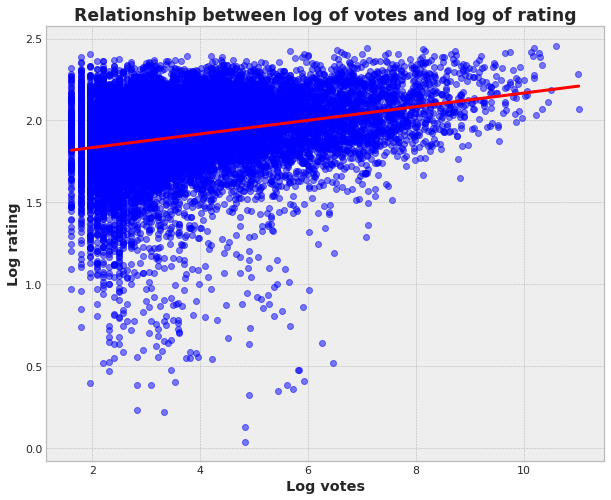

In [18]:
# Transform the variables
games['rating_log'] = np.log(games['rating'])
games['votes_log'] = np.log(games['votes'])

# Get the standard deviation of rating cubed to add noise to the scatterplot
games_rating_log_std = games.rating_log.std()

# Visualize the relationship of transformed variables
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x='votes_log',y='rating_log',data=games,color='blue',ci=None,
            y_jitter=games_rating_log_std,line_kws={'color':'red'},scatter_kws={'alpha':0.5})
ax.set(title='Relationship between log of votes and log of rating',xlabel='Log votes',ylabel='Log rating')
#plt.ylim([0,1100])
plt.show()

### Regression

The model predicts the rating of a game using the year of launch and number of votes received

In [19]:
# Define model 
model = ols('rating_log ~ votes_log + year',data=games).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             rating_log   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     764.5
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          5.40e-314
Time:                        19:14:20   Log-Likelihood:                 1809.7
No. Observations:               12532   AIC:                            -3613.
Df Residuals:                   12529   BIC:                            -3591.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4212      0.348     -6.955      0.000      -3.104      -1.739
votes_log      0.0399      0.001     35.515      0.000       0.038       0.042
year           0.0021      0.000     11.988      0.000       0.002       0.002
==============================================================================
Omnibus:                     7200.950   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80975.780
Skew:                          -2.575   Prob(JB):                         0.00
Kurtosis:                      14.338   Cond. No.                     3.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Making predictions

In [20]:
# Generate sample values to predict
votes_log = np.log(np.arange(1,500,30))
year = np.arange(1940,2061,5)

# Create different combinations for the votes_log and year
p= product(votes_log,year)

# Create dataframe to hold the values to be used for prediction
prediction_data = pd.DataFrame(p,columns=['votes_log','year'])
display(prediction_data)

,votes_log,year
0,0.000000,1940
1,0.000000,1945
2,0.000000,1950
3,0.000000,1955
4,0.000000,1960
...,...,...
420,6.175867,2040
421,6.175867,2045
422,6.175867,2050
423,6.175867,2055


In [21]:
# Generate the predictions using the model and store the result in the prediction dataset
prediction_data = prediction_data.assign(rating_log=model.predict(prediction_data))
display(prediction_data.head())

,votes_log,year,rating_log
0,0.0,1940,1.623234
1,0.0,1945,1.633658
2,0.0,1950,1.644082
3,0.0,1955,1.654505
4,0.0,1960,1.664929


### Back-transforming the variables
The predictions were made using the log of votes and log of rating. To convert these values to their respective antilogs, we use ```np.exp```

In [22]:
# Back transforming the log of votes to votes
prediction_data['votes'] = np.exp(prediction_data['votes_log'])

# Back transforming the log of rating to rating (antilog of the log of rating)
prediction_data['rating'] = np.exp(prediction_data['rating_log'])

The linear regression equation has been used to predict the average rating of video games using the year of launch and the number of votes.

In [23]:
display(prediction_data)

,votes_log,year,rating_log,votes,rating
0,0.000000,1940,1.623234,1.0,5.069458
1,0.000000,1945,1.633658,1.0,5.122578
2,0.000000,1950,1.644082,1.0,5.176254
3,0.000000,1955,1.654505,1.0,5.230492
4,0.000000,1960,1.664929,1.0,5.285299
...,...,...,...,...,...
420,6.175867,2040,2.078238,481.0,7.990375
421,6.175867,2045,2.088661,481.0,8.074100
422,6.175867,2050,2.099085,481.0,8.158703
423,6.175867,2055,2.109509,481.0,8.244193


Using 1950 and 2050 to show the contrast in the predictions, games produced in 1950 and have 1 vote would have likely had a rating of 5 while those produced in 2050 with 1 vote are likely to have a rating of 6.
On the other hand, a game produced in 1950 and having 481 votes would have likely had a rating of 7 while those produced in 2050 with similar votes would likely have a rating of 8

In [24]:
# Display year, votes and rating in predicted data for years 1950 and 2050
display(prediction_data.loc[(prediction_data['year']==1950) | (prediction_data['year']==2050),
                            ['year','votes','rating']])

,year,votes,rating
2,1950,1.0,5.176254
22,2050,1.0,6.376107
27,1950,31.0,5.936734
47,2050,31.0,7.312865
52,1950,61.0,6.099330
72,2050,61.0,7.513152
77,1950,91.0,6.197497
97,2050,91.0,7.634074
102,1950,121.0,6.268389
122,2050,121.0,7.721399
